In [38]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score



In [2]:
df = pd.read_csv("exams.csv")

In [3]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


Transformando as colunas em algo mais fácil de trabalhar

In [4]:
df.columns = ["genero", "etinia", "educacao_parental", "almoco", "curso_preparatorio", "nota_mat", "nota_leitura", "nota_escrita"]

In [5]:
df.head()

,genero,etinia,educacao_parental,almoco,curso_preparatorio,nota_mat,nota_leitura,nota_escrita
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [6]:
df.drop("almoco", axis=1, inplace = True)

In [7]:
df.head(5)

,genero,etinia,educacao_parental,curso_preparatorio,nota_mat,nota_leitura,nota_escrita
0,female,group D,some college,completed,59,70,78
1,male,group D,associate's degree,none,96,93,87
2,female,group D,some college,none,57,76,77
3,male,group B,some college,none,70,70,63
4,female,group D,associate's degree,none,83,85,86


In [8]:
var = list(map(lambda x: x.replace("completed", "1") if x == "completed" else x.replace("none", "0"), df["curso_preparatorio"]))

In [9]:
df["curso_preparatorio"] = var

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   genero              1000 non-null   object
 1   etinia              1000 non-null   object
 2   educacao_parental   1000 non-null   object
 3   curso_preparatorio  1000 non-null   object
 4   nota_mat            1000 non-null   int64 
 5   nota_leitura        1000 non-null   int64 
 6   nota_escrita        1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [11]:
 df["curso_preparatorio"] = df["curso_preparatorio"].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   genero              1000 non-null   object
 1   etinia              1000 non-null   object
 2   educacao_parental   1000 non-null   object
 3   curso_preparatorio  1000 non-null   int32 
 4   nota_mat            1000 non-null   int64 
 5   nota_leitura        1000 non-null   int64 
 6   nota_escrita        1000 non-null   int64 
dtypes: int32(1), int64(3), object(3)
memory usage: 50.9+ KB


In [13]:
df.head()

,genero,etinia,educacao_parental,curso_preparatorio,nota_mat,nota_leitura,nota_escrita
0,female,group D,some college,1,59,70,78
1,male,group D,associate's degree,0,96,93,87
2,female,group D,some college,0,57,76,77
3,male,group B,some college,0,70,70,63
4,female,group D,associate's degree,0,83,85,86


In [14]:
df["final"] = round((df["nota_mat"] + df["nota_leitura"] + df["nota_escrita"]) / 3, 2)

In [15]:
df["final"]

0      69.00
1      92.00
2      70.00
3      67.67
4      84.67
       ...  
995    75.00
996    70.67
997    79.67
998    71.33
999    50.00
Name: final, Length: 1000, dtype: float64

#### Aprovados e Reprovados

Vamos considerar aprovados aqueles que tiverem a nota final maior ou igual a 70

In [16]:
df.head()

,genero,etinia,educacao_parental,curso_preparatorio,nota_mat,nota_leitura,nota_escrita,final
0,female,group D,some college,1,59,70,78,69.00
1,male,group D,associate's degree,0,96,93,87,92.00
2,female,group D,some college,0,57,76,77,70.00
3,male,group B,some college,0,70,70,63,67.67
4,female,group D,associate's degree,0,83,85,86,84.67


In [17]:
df["flare"] = df["final"].apply(lambda x: True if x >= 70 else False)

In [18]:
df.head()

,genero,etinia,educacao_parental,curso_preparatorio,nota_mat,nota_leitura,nota_escrita,final,flare
0,female,group D,some college,1,59,70,78,69.00,False
1,male,group D,associate's degree,0,96,93,87,92.00,True
2,female,group D,some college,0,57,76,77,70.00,True
3,male,group B,some college,0,70,70,63,67.67,False
4,female,group D,associate's degree,0,83,85,86,84.67,True


#### Verificando as variáveis dummies

In [19]:
df.nunique()

genero                  2
etinia                  5
educacao_parental       6
curso_preparatorio      2
nota_mat               79
nota_leitura           71
nota_escrita           74
final                 190
flare                   2
dtype: int64

In [20]:
df.educacao_parental.value_counts()

some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: educacao_parental, dtype: int64

In [21]:
df.etinia.value_counts()

group C    323
group D    257
group B    198
group E    143
group A     79
Name: etinia, dtype: int64

Vamos mudar a variável ``etinia`` para dummie da seguinte forma, se pertencer aos grupos A, B, C = 1  se não = 0 

In [22]:
def class_group(x):
    if x == "group A":
        return True
    elif x == "group B":
        return True
    elif x == "group C":
        return True
    elif x == "group D":
        return False
    elif x == "group E":
        return False

In [23]:
df["etinia"] = df["etinia"].apply(class_group)

In [24]:
df.head()

,genero,etinia,educacao_parental,curso_preparatorio,nota_mat,nota_leitura,nota_escrita,final,flare
0,female,False,some college,1,59,70,78,69.00,False
1,male,False,associate's degree,0,96,93,87,92.00,True
2,female,False,some college,0,57,76,77,70.00,True
3,male,True,some college,0,70,70,63,67.67,False
4,female,False,associate's degree,0,83,85,86,84.67,True


In [25]:
df_encoded = pd.get_dummies(data=df, drop_first=True, columns=["genero", "etinia", "curso_preparatorio", "flare"])

In [27]:
df_encoded.head()

,educacao_parental,nota_mat,nota_leitura,nota_escrita,final,genero_male,etinia_True,curso_preparatorio_1,flare_True
0,some college,59,70,78,69.00,0,0,1,0
1,associate's degree,96,93,87,92.00,1,0,0,1
2,some college,57,76,77,70.00,0,0,0,1
3,some college,70,70,63,67.67,1,1,0,0
4,associate's degree,83,85,86,84.67,0,0,0,1


Definindo X e y

In [32]:
df_encoded.iloc[:, 5:8]

,genero_male,etinia_True,curso_preparatorio_1
0,0,0,1
1,1,0,0
2,0,0,0
3,1,1,0
4,0,0,0
...,...,...,...
995,1,1,0
996,1,1,0
997,0,1,1
998,1,0,0


In [33]:
X = df_encoded.iloc[:, 5:8]
y = df_encoded["flare_True"]

In [45]:
clf = tree.DecisionTreeClassifier(random_state=100)

In [46]:
x_test, x_treino, y_test, y_treino = train_test_split(X, y, test_size=0.3, random_state=100)

In [47]:
clf = clf.fit(x_treino, y_treino)

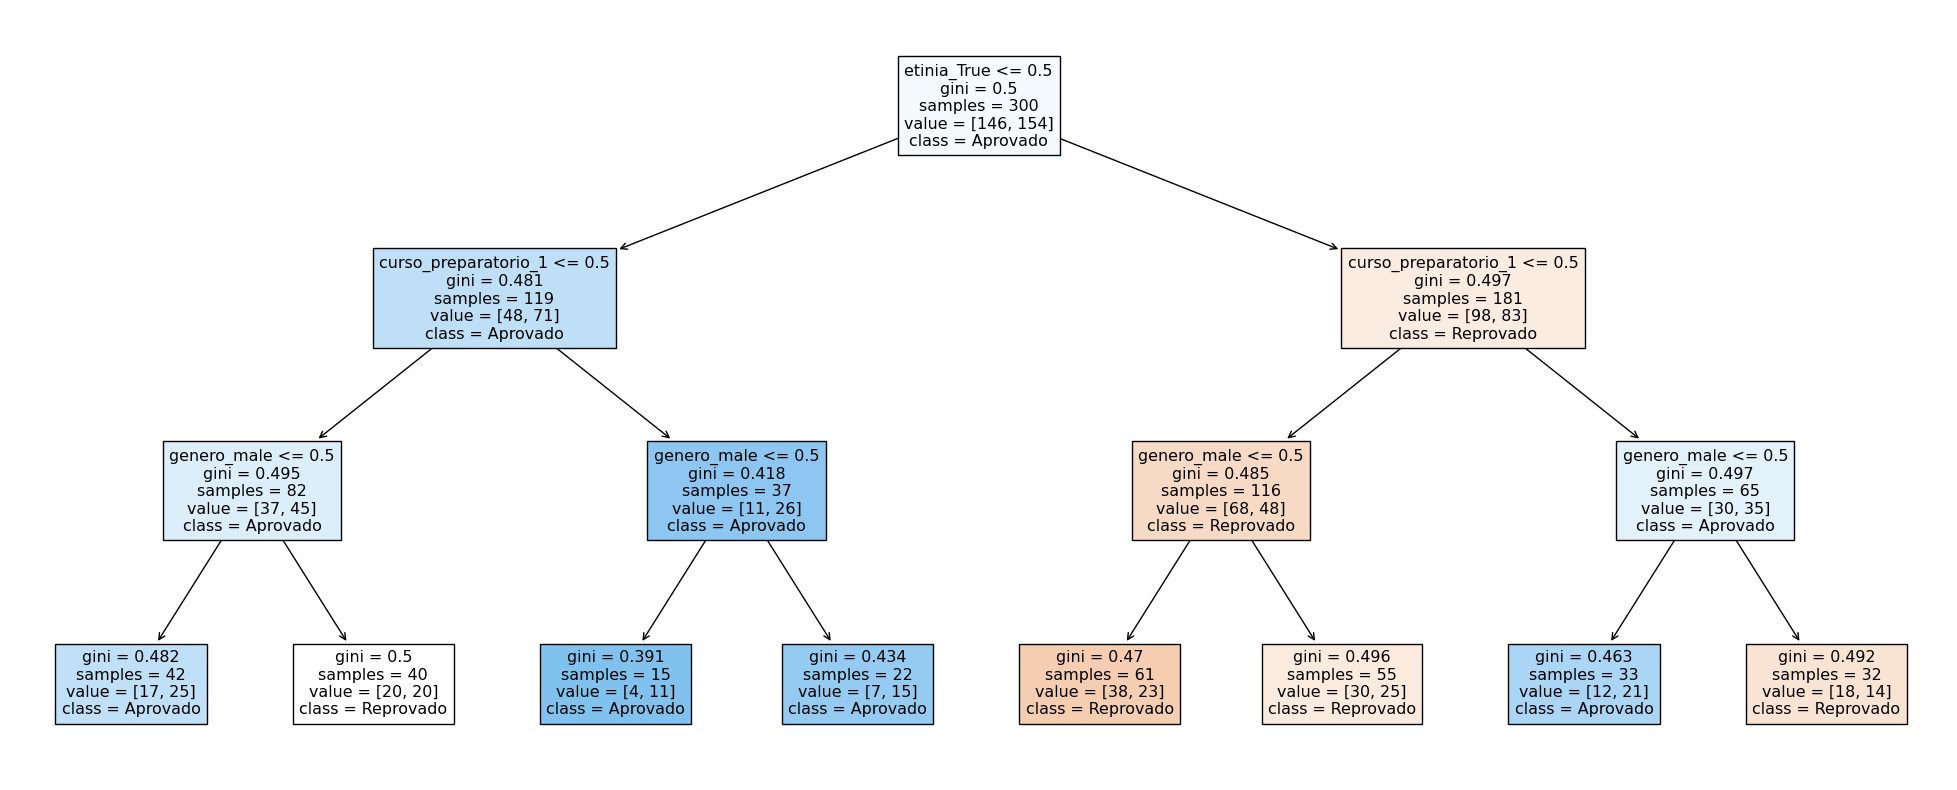

In [50]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Reprovado', 'Aprovado'],
         feature_names=X.columns);

In [53]:
pred = clf.predict(x_test)

In [57]:
len(pred)

700

In [61]:
accuracy_score(y_test, pred)

0.6

In [62]:
cm = confusion_matrix(y_test, pred)

In [66]:
disp = ConfusionMatrixDisplay(cm, display_labels=["Reprovado", "Aprovado"])

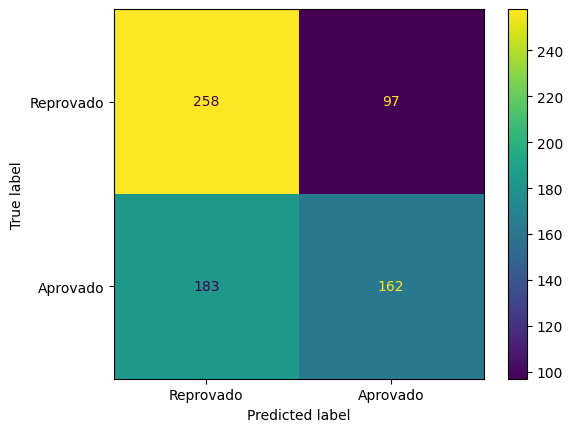

In [67]:
disp.plot()